<div style="background-color: lightblue; padding: 10px; font-weight: bold; font-size: 30px">
Project 2 - Skin Tumor Prediction
<div

The objective of this project is to develop and test different machine-learning models to accurately detect and classify different types of skin tumors from a collection of multi-source dermatoscopic images of pigmented lesions. According to the creator of the datase, dermatoscopic images are collected from different populations and are acquired and stored by different modalities (histopathology, follow-up examination, expert consensus and  in-vivo confocal microscopy). The dataset contains a total of 10,015 images. The development of an effective machine learning classification system to detect the type of skin tumor can be highly beneficial for several reasons. Firstly, it offers the opportunity for early detection and diagnosis, significantly improving the likelihood of successful treatment and better patient outcomes. By efficiently categorizing pigmented lesions from simple images, the algorithm can play a crucial role in the initial stages of diagnosis without the need for immediate clinical analysis. Additionally, an accurate and efficient algorithm can support dermatologists in reducing the risks of misdiagnosis and facilitate the overall detection of skin tumors on a large scale. 

The dataset contains images from six different typologies of skin tumors:

>- **Melanocytic Nevi (nv)**. *Commonly known as moles, are harmless pigmented skin spots, not indicative of cancer.*
>
>- **Melanoma (mel)**. *A serious skin cancer that originates from melanocytes, the cells producing skin pigment, and can spread rapidly if untreated.*
>
> - **Benign Keratosis-Like Lesions (bkl)**. *Non-cancerous growths that resemble warts or keratosis and do not pose cancer risks.*
>
> - **Basal Cell Carcinoma (bcc)**. *Slow-growing skin cancer that begins in the skin's basal cells, often requiring removal but having a high cure rate.*
>
> - **Actinic Keratoses and Intraepithelial Carcinoma (akiec)**. *Pre-cancerous condition that has the potential to develop into invasive squamous cell carcinoma if not treated.*
>
> - **Vascular Lesions (vasc)**. *Encompass various non-cancerous irregularities in blood vessels, such as birthmarks or hemangiomas.*
>
> - **Dermatofibroma (df)**. *Benign skin growths resulting from minor injuries and do not involve cancerous changes.*

For this project, I perform a binary image classification, comparing the class **Melanocytic Nevi (nv)** against all the others. 

To extract features from images, I utilize a combination of the following four image-processing machine learning models:
<ul style="list-style-type: none;">
    <li><span style="color: green; font-size: larger;">🎯</span> Mean Pixel Value</li>
    <li><span style="color: green; font-size: larger;">🎯</span> Horizontal Edges</li>
    <li><span style="color: green; font-size: larger;">🎯</span> Vertical Edges</li>
    <li><span style="color: green; font-size: larger;">🎯</span> Local Binary Patterns (LBP)</li>
</ul>
The Machine-Learning models tested for classification are:
<ul style="list-style-type: none;">
    <li><span style="color: green; font-size: larger;">✅</span> K-Nearest Neighbors (KNN)</li>
    <li><span style="color: green; font-size: larger;">✅</span> Naive Bayes</li>
    <li><span style="color: green; font-size: larger;">✅</span> Support Vector Machines</li>
    <li><span style="color: green; font-size: larger;">✅</span> Decision Tree</li>
    <li><span style="color: green; font-size: larger;">✅</span> Random Forest</li>
    <li><span style="color: green; font-size: larger;">✅</span> Logistic Regression</li>
</ul>

Dataset: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000

<div style="background-color: lightblue; padding: 10px; font-weight: bold; font-size: 20px">
Data Exploration
</div>

Importing all the required libraries

In [1]:
# Image Processing
from skimage.feature import local_binary_pattern
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.filters import prewitt_h, prewitt_v

# Data Manipulation and Analysis
import numpy as np
import pandas as pd
from numpy import mean, std

# Machine Learning - Data Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, jaccard_score, accuracy_score, confusion_matrix
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import PCA
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.encoder import type_encoding, cluster_encoder

# Machine Learning Classification Algorithms
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import random_center_initializer

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Files management 
import os
import pickle
from os import listdir
from os.path import isfile, join

Defining **mypath** as the location where my images are stored

In [2]:
# The location where my images are stored
mypath = 'C:\\Users\\aless\\Desktop\\Computer Vision\\Skin Tumor\\All'

Reading the csv file with the picture's names and categories inside a pandas dataframe

In [3]:
df = pd.read_csv('C:\\Users\\aless\\Desktop\\Computer Vision\\Skin Tumor\\HAM10000_metadata.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


Removing the columns **lesion_id**, **dx_type**, **age**, **sex** and **localization**, since they are not releval for image classification processing.

In [4]:
df.drop(columns=['lesion_id', 'dx_type', 'age', 'sex', 'localization'], inplace=True)

Checking for missing data - Luckily, there is no missing data!

In [5]:
df.isna().sum()

image_id    0
dx          0
dtype: int64

<div style="background-color: lightblue; padding: 10px; font-weight: bold; font-size: 20px">
Data Visualization
</div>

Reading a sample image and visualizing it

### Visualization 1 - Melanocytic Nevi (nv) 

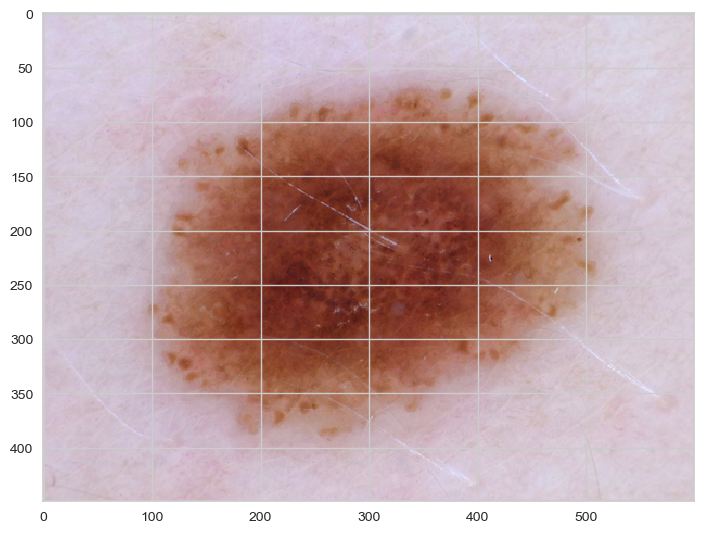

In [6]:
#reading an image and displaying it 
image = imread('C:\\Users\\aless\\Desktop\\Computer Vision\\Skin Tumor\\Image_example\\ISIC_0024317.jpg')
imshow(image)

Viewing the dimensions of the image

In [7]:
image.shape

(450, 600, 3)

Viewing the contents of the image array

In [8]:
image

array([[[214, 202, 222],
        [213, 201, 223],
        [215, 203, 227],
        ...,
        [215, 203, 217],
        [214, 203, 217],
        [216, 204, 218]],

       [[212, 200, 222],
        [212, 200, 220],
        [215, 203, 223],
        ...,
        [210, 198, 210],
        [211, 199, 211],
        [211, 199, 209]],

       [[211, 199, 219],
        [213, 201, 221],
        [214, 202, 224],
        ...,
        [210, 198, 208],
        [213, 200, 210],
        [211, 198, 208]],

       ...,

       [[206, 189, 199],
        [207, 192, 199],
        [205, 190, 197],
        ...,
        [212, 199, 208],
        [213, 200, 209],
        [211, 198, 208]],

       [[206, 190, 200],
        [205, 188, 198],
        [202, 184, 196],
        ...,
        [214, 196, 208],
        [211, 195, 206],
        [208, 195, 205]],

       [[205, 189, 200],
        [206, 189, 199],
        [203, 186, 196],
        ...,
        [214, 196, 208],
        [213, 196, 206],
        [210, 194, 204]]

### Visualization 2 - Melanocytic Nevi (nv) - Red Band

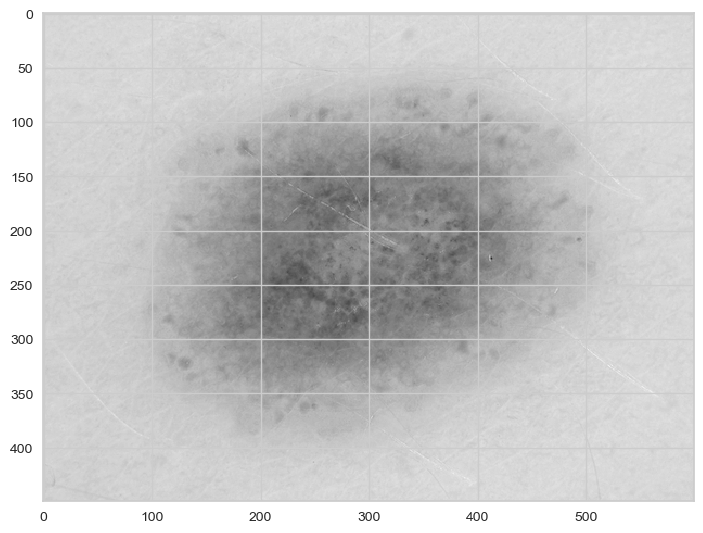

In [9]:
#Viewing the red band of the image
imshow(image[:,:,0])

### Visualization 3 - Melanocytic Nevi (nv) - Green Band

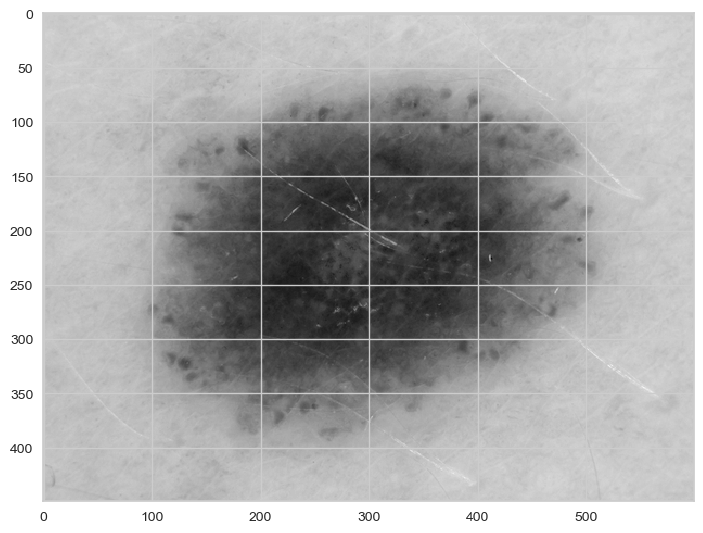

In [10]:
#Viewing the green band of the image
imshow(image[:,:,1])

### Visualization 3 - Melanocytic Nevi (nv) - Blue Band

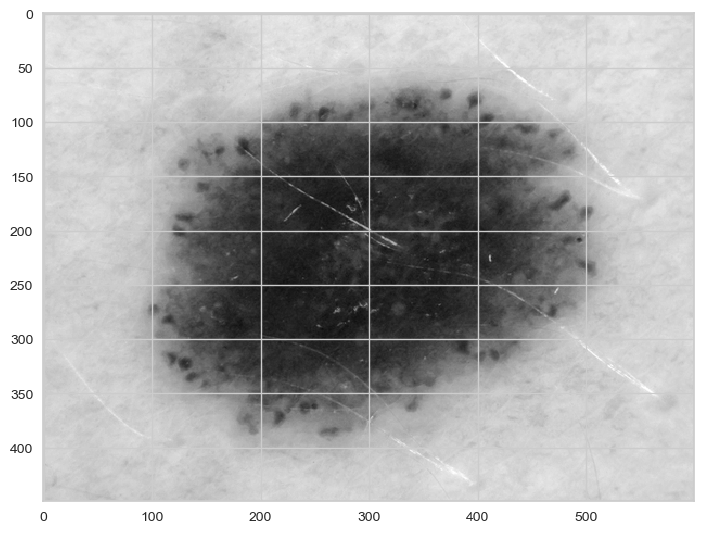

In [11]:
#Viewing the blue band of the image
imshow(image[:,:,2])

<div style="background-color: lightblue; padding: 10px; font-weight: bold; font-size: 20px">
Preprocessing Data and Running Machine Learning Models
</div>

Plotting the distribution of the features

### Plot 1 -  Tumor Distribution

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'nv'),
  Text(1, 0, 'mel'),
  Text(2, 0, 'bkl'),
  Text(3, 0, 'bcc'),
  Text(4, 0, 'akiec'),
  Text(5, 0, 'vasc'),
  Text(6, 0, 'df')])

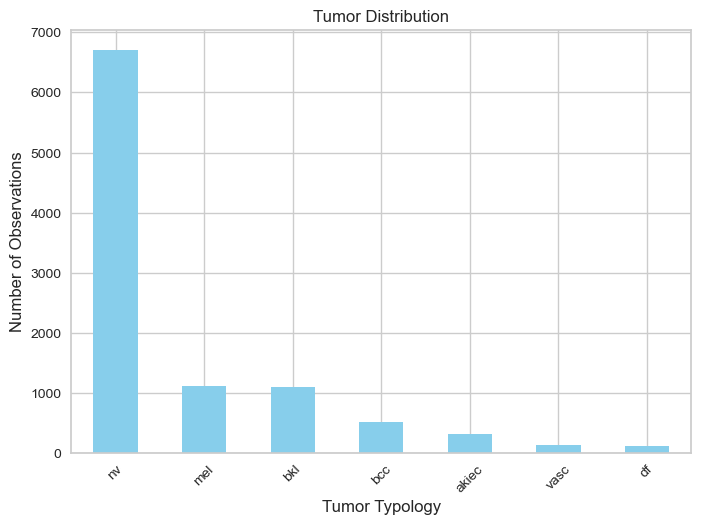

In [12]:
value_counts = df['dx'].value_counts()
ax = value_counts.plot(kind='bar', color='skyblue')

plt.title('Tumor Distribution')
plt.xlabel('Tumor Typology')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45) 

Resizing the dataset by randomly selecting 100 images from each category

In [13]:
Samplesize = 100      

df = df.groupby('dx', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:])

### Plot 2  - Tumors Distribution with Resized Dataset 

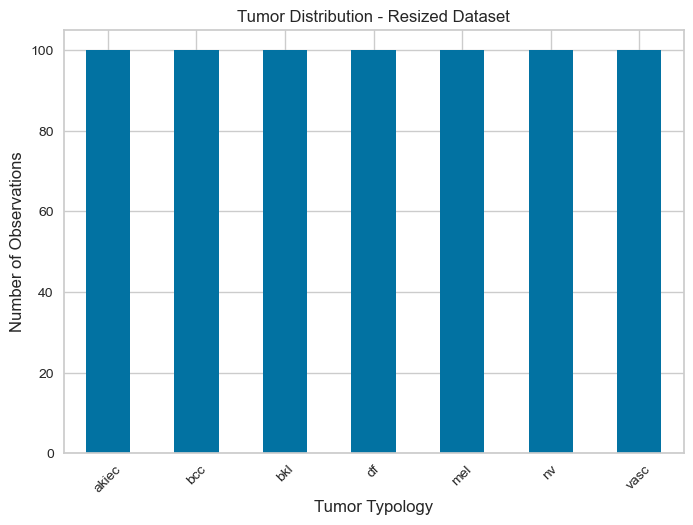

In [14]:
df['dx'].value_counts().plot(kind='bar')
plt.title('Tumor Distribution - Resized Dataset')
plt.xlabel('Tumor Typology')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45) 
plt.show()

Creating 6 different dataframes. Comparing **Melanocytic nevi (nv)** to all the others type of Tumors.

In [15]:
df1 = df.loc[(df['dx'] == 'nv' ) | (df['dx'] == 'mel' )]
df2 = df.loc[(df['dx'] == 'nv' ) | (df['dx'] == 'bkl' )]
df3 = df.loc[(df['dx'] == 'nv' ) | (df['dx'] == 'bcc' )]
df4 = df.loc[(df['dx'] == 'nv' ) | (df['dx'] == 'akiec')]
df5 = df.loc[(df['dx'] == 'nv' ) | (df['dx'] == 'vasc' )]
df6 = df.loc[(df['dx'] == 'nv' ) | (df['dx'] == 'df' )]

#Creating a dictionary: each dataframe has a corresponding label
categories= {'Melanocytic nevi vs Melanoma': df1, 
             'Melanocytic nevi vs Benign keratosis-like lesion': df2,
             'Melanocytic nevi vs Basal cell carcinom': df3,
             "Melanocytic nevi vs Bowen's disease" : df4,
             'Melanocytic nevi vs Vascular lesions': df5,
             'Melanocytic nevi vs Dermatofibroma': df6,
            }


For each dataframe, one by one I am going to running through the model that I am building. 

In [16]:
for comparison in categories:
  df = categories[comparison]

# Create a list of all the images inside my dataframe
  image_list = df['image_id'].tolist()

  # type of LBP
  METHOD = 'uniform'  # at most two circular 0-1 or 1-0 transitions
  radius = 1  # distance between central pixels and comparison pixels
  n_points = 8 * radius  # define number of comparison pixels

  # create list for LBP representations
  #lbp_imgs = []
  all_features= [] #For every single image that I process, I store it's long vector inside here.
                   #Each image has a vector that has 40k columns

  # create LBP for each image and add to list
  count = 0
  for i in image_list:
    count += 1
    print(count, end=' ')
    #the path of the image
    image_path = os.path.join('C:\\Users\\aless\\Desktop\\Computer Vision\\Skin Tumor\\All', i + '.jpg')
    #reading the image
    image = imread(image_path)
    # resizing my image
    image = resize(image, (100,100))
    
    #finding the sum of the RGB values for all 3 RGB bands for each pixel
    rgb_feature_matrix = image[:,:,0] + image[:,:,1] + image[:,:,2]
    #finding the average RGB value for each pixel by dividing by 3
    rgb_feature_matrix = rgb_feature_matrix / 3

    #flattening the features array into a single 1D vector
    rgb_features = np.reshape(rgb_feature_matrix, (100*100)) 

    #lbp feature extraction
  
    gray_image = rgb2gray(image)
    
    lbp_image = local_binary_pattern(gray_image, n_points, radius, METHOD)
    lbp_features = np.reshape(lbp_image, (100*100))

    horizontal_edges = prewitt_h(gray_image)
    #print(horizontal_edges.shape)
    horizontal_edges = np.reshape(horizontal_edges, (100*100)) 


    #calculating vertical edges using prewitt kernel
    vertical_edges = prewitt_v(gray_image)

    vertical_edges = np.reshape(vertical_edges, (100*100)) 

    all_features.append(np.concatenate( (rgb_features, lbp_features, horizontal_edges, vertical_edges) ))

  #converting list to np array  
  all_features  = np.array(all_features)
    
  #Separating features from the label  
  X = all_features
  y = df['dx'].values 

  #Plitting the dataset into Training and Test in the proportion 75/25
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

  #Rescaling the features with Standardization method
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  #Building and training the Machine Learning Models (Decision Tree, KNN, Gaussian Naive Bayes, Random Forest, Logistic Regression)
  DT = DecisionTreeClassifier()
  Knn =KNeighborsClassifier(n_neighbors=10)
  gnb = GaussianNB()
  rfc=RandomForestClassifier(n_estimators=100)
  logReg = LogisticRegression(random_state = 0, max_iter=100, solver='lbfgs', multi_class='auto')
  logReg.fit(X_train, y_train)

  DT.fit(X_train, y_train)
  Knn.fit(X_train,y_train)
  gnb.fit(X_train, y_train)
  rfc.fit(X_train, y_train)

   #Building and training Support Vector Machine models with different Kernels
  linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
  rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
  poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
  sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

  #Performing 5-Fold Cross Validation for all the models
  cv = KFold(n_splits=5, random_state=1, shuffle=True)

  scores = cross_val_score(linear, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'linear Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

    
  scores = cross_val_score(rbf, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'RBF Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

  scores = cross_val_score(poly, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'Poly Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

    
  scores = cross_val_score(sig, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'Sig Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

  scores = cross_val_score(DT, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'DT CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

    
  scores = cross_val_score(Knn, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'KNN CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

  scores = cross_val_score(gnb, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'GNB CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

    
  scores = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'RFC CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

  scores = cross_val_score(logReg, X_train, y_train, scoring='accuracy', cv=cv)
  print(f'LogReg CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')
  print()

  #Predicting the Test set results for all the models
  linear_pred = linear.predict(X_test)
  poly_pred = poly.predict(X_test)
  rbf_pred = rbf.predict(X_test)
  sig_pred = sig.predict(X_test)  

  dt_pred = DT.predict(X_test)
  knn_y_pred = Knn.predict(X_test)
  gnb_pred = gnb.predict(X_test)
  logReg_pred = logReg.predict(X_test)
  rfc_pred = rfc.predict(X_test)

  # retrieve the accuracy and print it for all 4 kernel functions
  print('VARIOUS SVM')
  accuracy_lin = linear.score(X_test, y_test)
  accuracy_poly = poly.score(X_test, y_test)
  accuracy_rbf = rbf.score(X_test, y_test)
  accuracy_sig = sig.score(X_test, y_test)

  print()
  print(comparison)
  print(f'Accuracy Linear Kernel: {accuracy_lin * 100}')
  print(f'Accuracy Polynomial Kernel: {accuracy_poly * 100}')
  print(f'Accuracy Radial Basis Kernel: {accuracy_rbf * 100}')
  print(f'Accuracy Sigmoid Kernel: {accuracy_sig * 100}')

  print(f'Classification Report for Log Reg')
  print(classification_report(y_test, logReg_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  logReg_pred)*100,2)}')

  print(f'Classification Report for Linear SVM')
  print(classification_report(y_test, linear_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  linear_pred)*100,2)}')


  print(f'Classification Report for Poly SVM')
  print(classification_report(y_test, poly_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  poly_pred)*100,2)}')


  print(f'Classification Report for RBF SVM')
  print(classification_report(y_test, rbf_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  rbf_pred)*100,2)}')


  print(f'Classification Report for SIG SVM')
  print(classification_report(y_test, sig_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, sig_pred)*100,2)}')


  print(f'Classification Report for DT')
  print(classification_report(y_test, dt_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, dt_pred)*100,2)}')

  print('KNN')
  print(classification_report(y_test, knn_y_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, knn_y_pred)*100,2)}')

  print('GNB')
  print(classification_report(y_test, gnb_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, gnb_pred)*100,2)}')

  print('RFC')
  print(classification_report(y_test, rfc_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, rfc_pred)*100,2)}')

  print()


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 linear Svm CV Accuracy:  (65.33, 13.27) 
RBF Svm CV Accuracy:  (40.67, 8.27) 
Poly Svm CV Accuracy:  (50.0, 11.35) 
Sig Svm CV Accuracy:  (70.0, 10.54) 
DT CV Accuracy:  (68.0, 12.4) 
KNN CV Accuracy:  (53.33, 8.94) 
GNB CV Accuracy:  (69.33, 8.27) 
RFC CV Accuracy:  (76.0, 12.36) 
LogReg CV Accuracy:  (67.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metr

4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 linear Svm CV Accuracy:  (66.0, 7.72) 
RBF Svm CV Accuracy:  (40.67, 8.27) 
Poly Svm CV Accuracy:  (42.67, 6.8) 
Sig Svm CV Accuracy:  (66.0, 9.98) 
DT CV Accuracy:  (64.67, 6.18) 
KNN CV Accuracy:  (67.33, 8.54) 
GNB CV Accuracy:  (66.0, 11.81) 
RFC CV Accuracy:  (69.33, 9.04) 
LogReg CV Accuracy:  (68.0, 8.06) 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 linear Svm CV Accuracy:  (76.67, 5.58) 
RBF Svm CV Accuracy:  (40.67, 8.27) 
Poly Svm CV Accuracy:  (48.67, 13.43) 
Sig Svm CV Accuracy:  (73.33, 4.71) 
DT CV Accuracy:  (66.0, 3.89) 
KNN CV Accuracy:  (67.33, 7.72) 
GNB CV Accuracy:  (75.33, 12.4) 
RFC CV Accuracy:  (76.67, 5.58) 
LogReg CV Accuracy:  (76.0, 4.42)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 linear Svm CV Accuracy:  (80.0, 4.71) 
RBF Svm CV Accuracy:  (40.67, 8.27) 
Poly Svm CV Accuracy:  (41.33, 7.48) 
Sig Svm CV Accuracy:  (81.33, 4.0) 
DT CV Accuracy:  (70.67, 3.89) 
KNN CV Accuracy:  (50.67, 9.75) 
GNB CV Accuracy:  (82.0, 8.84) 
RFC CV Accuracy:  (82.0, 3.4) 
LogReg CV Accuracy:  (80.67, 4.9) 



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metr

4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 linear Svm CV Accuracy:  (51.33, 8.84) 
RBF Svm CV Accuracy:  (40.67, 8.27) 
Poly Svm CV Accuracy:  (44.0, 12.0) 
Sig Svm CV Accuracy:  (52.0, 7.77) 
DT CV Accuracy:  (52.0, 6.18) 
KNN CV Accuracy:  (56.67, 8.69) 
GNB CV Accuracy:  (53.33, 5.58) 
RFC CV Accuracy:  (56.67, 9.43) 
LogReg CV Accuracy:  (51.33, 8.84)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metr

4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 linear Svm CV Accuracy:  (74.0, 9.29) 
RBF Svm CV Accuracy:  (40.67, 8.27) 
Poly Svm CV Accuracy:  (48.0, 11.27) 
Sig Svm CV Accuracy:  (71.33, 10.24) 
DT CV Accuracy:  (70.67, 8.0) 
KNN CV Accuracy:  (72.67, 15.55) 
GNB CV Accuracy:  (71.33, 11.66) 
RFC CV Accuracy:  (76.0, 5.33) 
LogReg CV Accuracy:  (74.0, 9.2

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metr

### Plot 3 - Distortion Score Elbow for KMeans Clustering

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

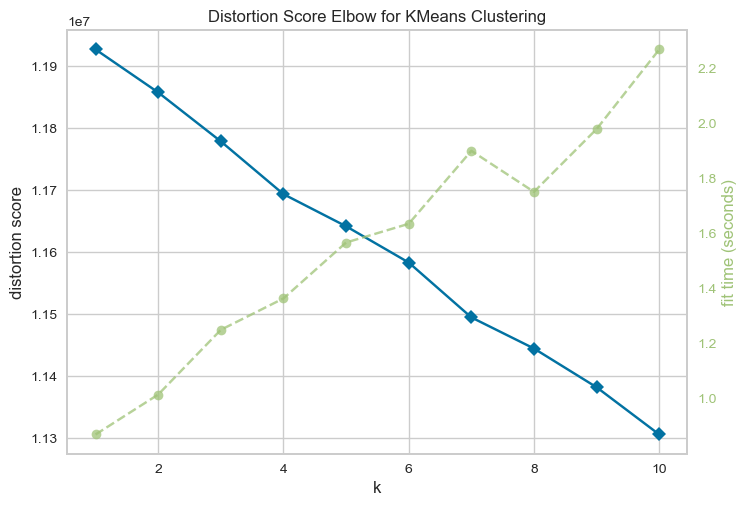

In [17]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

<div style="background-color: lightblue; padding: 10px; font-weight: bold; font-size: 20px">
PERFORMANCE ANALYSIS
</div>

Comparing **5-Fold Cross Validation** accuracy scores of **SVM** for the different dataframes, to select the best performing Kernel

In [18]:
# Data for SVM models
svm_cv_data = {
    'Comparison': ['mn vs mel', 'mn vs bkl',
                   'mn vs bcc', 'mn vs akiec',
                   'mn vs vasc', 'mn vs df'],
    'linear Svm': [60.0, 68.67, 81.33, 80.67, 66.67, 81.33],
    'RBF Svm': [40.67, 40.67, 40.67, 40.67, 40.67, 40.67],
    'Poly Svm': [44.67, 42.67, 50.67, 45.33, 44.0, 50.67],
    'Sig Svm': [60.0, 65.33, 78.67, 79.33, 68.0, 78.67]
}

# Create a DataFrame
svm_cv_df = pd.DataFrame(svm_cv_data)
# Create a DataFrame
svm_cv_df.set_index('Comparison', inplace=True)

# Display the DataFrame
print(svm_cv_df)

             linear Svm  RBF Svm  Poly Svm  Sig Svm
Comparison                                         
mn vs mel         60.00    40.67     44.67    60.00
mn vs bkl         68.67    40.67     42.67    65.33
mn vs bcc         81.33    40.67     50.67    78.67
mn vs akiec       80.67    40.67     45.33    79.33
mn vs vasc        66.67    40.67     44.00    68.00
mn vs df          81.33    40.67     50.67    78.67


The **Linear Kernel** is the best performing, therefore I will use **Linear SVM** to make comparisons with the other Machine Learning Models.

Comparing 5-Fold Cross Validation of the Machine Learning models for each different dataframe

In [19]:
# Data for SVM models
cv_models_data = {
    'Comparison': ['mn vs mel', 'mn vs bkl',
                   'mn vs bcc', 'mn vs akiec',
                   'mn vs vasc', 'mn vs df'],
    'linear Svm': [60.0, 68.67, 81.33, 80.67, 66.67, 81.33],
    'DT': [59.33, 60.67, 74.67, 86.0, 58.0, 74.67],
    'KNN': [59.33, 62.67, 74.67, 66.67, 57.33, 74.67],
    'GNB': [65.33, 68.0, 79.33, 86.67, 64.67, 79.33],
    'RFC': [64.67, 66.67, 83.33, 84.0, 68.67, 83.33],
    'LogReg': [62.0, 69.33, 82.67, 80.67, 66.67, 82.67]
}

# Create a DataFrame
cv_models_df = pd.DataFrame(cv_models_data)
cv_models_df.set_index('Comparison', inplace=True)

# Display the DataFrame
print(cv_models_df)

             linear Svm     DT    KNN    GNB    RFC  LogReg
Comparison                                                 
mn vs mel         60.00  59.33  59.33  65.33  64.67   62.00
mn vs bkl         68.67  60.67  62.67  68.00  66.67   69.33
mn vs bcc         81.33  74.67  74.67  79.33  83.33   82.67
mn vs akiec       80.67  86.00  66.67  86.67  84.00   80.67
mn vs vasc        66.67  58.00  57.33  64.67  68.67   66.67
mn vs df          81.33  74.67  74.67  79.33  83.33   82.67


Calculate the average values for each model across all classes and storing the results inside a dataframe

In [20]:
#Calculate the average values for each model across all classes
cv_average_values = cv_models_df.mean()

# Create a new DataFrame to store cv average values
cv_average_df = pd.DataFrame({
    'Model': cv_average_values.index,
    'Average CV Accuracy': cv_average_values.values
})

# Display the new DataFrame
print(cv_average_df)

        Model  Average CV Accuracy
0  linear Svm            73.111667
1          DT            68.890000
2         KNN            65.890000
3         GNB            73.888333
4         RFC            75.111667
5      LogReg            74.001667


### Plot 4 -  Average CV Accuracy for Different Models

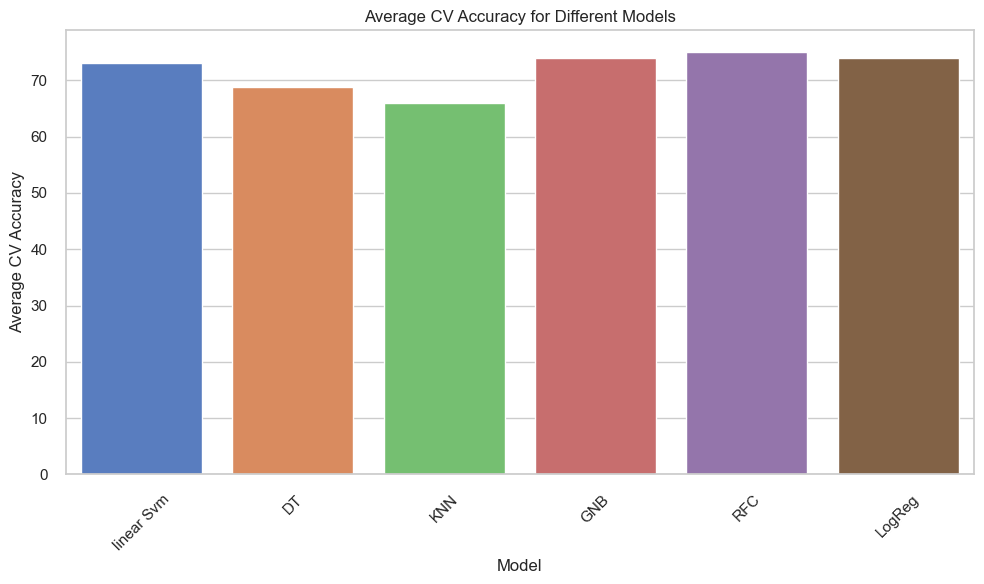

In [21]:
# Create the DataFrame with average values
average_values = cv_models_df.mean()
average_df = pd.DataFrame({
    'Model': average_values.index,
    'Average CV Accuracy': average_values.values
})

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='Model', y='Average CV Accuracy', data=average_df, palette="muted")

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Average CV Accuracy")
plt.title("Average CV Accuracy for Different Models")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

**Melanocytic nevi vs Melanoma**

In [22]:
mn_ml_data = [
    ["Log Reg", 0.68, 0.70, 0.68, 0.66],
    ["SVM", 0.68, 0.70, 0.68, 0.66],
    ["DT", 0.50, 0.50, 0.50, 0.50],
    ["KNN", 0.56, 0.55, 0.56, 0.54],
    ["GNB", 0.70, 0.70, 0.70, 0.70],
    ["RFC", 0.74, 0.75, 0.74, 0.74]
]

columns = ["Model", "Accuracy", "Precision", "Recall", "F1"]
mn_ml_df = pd.DataFrame(mn_ml_data, columns=columns)

print(mn_ml_df )

     Model  Accuracy  Precision  Recall    F1
0  Log Reg      0.68       0.70    0.68  0.66
1      SVM      0.68       0.70    0.68  0.66
2       DT      0.50       0.50    0.50  0.50
3      KNN      0.56       0.55    0.56  0.54
4      GNB      0.70       0.70    0.70  0.70
5      RFC      0.74       0.75    0.74  0.74


**Melanocytic nevi vs Benign keratosis-like lesion**

In [23]:
mn_bkl_data = [
    ["Log Reg", 0.82, 0.82, 0.82, 0.82],
    ["SVM", 0.82, 0.82, 0.82, 0.82],
    ["DT", 0.66, 0.66, 0.66, 0.66],
    ["KNN", 0.84, 0.85, 0.84, 0.84],
    ["GNB", 0.74, 0.75, 0.74, 0.74],
    ["RFC", 0.86, 0.87, 0.86, 0.86]
]

columns = ["Model", "Accuracy", "Precision", "Recall", "F1"]
mn_bkl_df = pd.DataFrame(mn_bkl_data, columns=columns)

print(mn_bkl_df)

     Model  Accuracy  Precision  Recall    F1
0  Log Reg      0.82       0.82    0.82  0.82
1      SVM      0.82       0.82    0.82  0.82
2       DT      0.66       0.66    0.66  0.66
3      KNN      0.84       0.85    0.84  0.84
4      GNB      0.74       0.75    0.74  0.74
5      RFC      0.86       0.87    0.86  0.86


**Melanocytic nevi vs Basal cell carcinom**

In [24]:
mn_bcc_data = [
    ["Log Reg", 0.76, 0.76, 0.76, 0.76],
    ["SVM", 0.78, 0.79, 0.78, 0.78],
    ["DT", 0.72, 0.72, 0.72, 0.72],
    ["KNN", 0.74, 0.75, 0.74,0.74],
    ["GNB", 0.84, 0.86, 0.84, 0.84],
    ["RFC", 0.84, 0.84, 0.84, 0.84]
]

columns = ["Model", "Accuracy", "Precision", "Recall", "F1"]
mn_bcc_df = pd.DataFrame(mn_bcc_data, columns=columns)

print(mn_bcc_df)

     Model  Accuracy  Precision  Recall    F1
0  Log Reg      0.76       0.76    0.76  0.76
1      SVM      0.78       0.79    0.78  0.78
2       DT      0.72       0.72    0.72  0.72
3      KNN      0.74       0.75    0.74  0.74
4      GNB      0.84       0.86    0.84  0.84
5      RFC      0.84       0.84    0.84  0.84


**Melanocytic nevi vs Actinic Keratoses and Intraepithelial Carcinoma**

In [25]:
mn_akiec_data = [
    ["Log Reg", 0.86, 0.86, 0.86, 0.86],
    ["SVM", 0.86, 0.86, 0.86, 0.86],
    ["DT", 0.88, 0.88, 0.88, 0.88],
    ["KNN", 0.68,0.70,0.68,0.6],
    ["GNB", 0.78, 0.79, 0.78, 0.78],
    ["RFC", 0.92, 0.92, 0.92, 0.92]
]

columns = ["Model", "Accuracy", "Precision", "Recall", "F1"]
mn_akiec_df = pd.DataFrame(mn_akiec_data, columns=columns)

print(mn_akiec_df )

     Model  Accuracy  Precision  Recall    F1
0  Log Reg      0.86       0.86    0.86  0.86
1      SVM      0.86       0.86    0.86  0.86
2       DT      0.88       0.88    0.88  0.88
3      KNN      0.68       0.70    0.68  0.60
4      GNB      0.78       0.79    0.78  0.78
5      RFC      0.92       0.92    0.92  0.92


**Melanocytic nevi vs Vascular lesions**

In [26]:
mn_vasc_data = [
    ["Log Reg", 0.60, 0.60, 0.60, 0.60],
    ["SVM", 0.60, 0.60, 0.60, 0.60],
    ["DT", 0.68, 0.69, 0.68, 0.68],
    ["KNN", 0.58, 0.60, 0.58, 0.52],
    ["GNB", 0.66, 0.66, 0.66, 0.66],
    ["RFC", 0.68, 0.70, 0.68, 0.68]
]

columns = ["Model", "Accuracy", "Precision", "Recall", "F1"]
mn_vasc_df = pd.DataFrame(mn_vasc_data, columns=columns)

print(mn_vasc_df )

     Model  Accuracy  Precision  Recall    F1
0  Log Reg      0.60       0.60    0.60  0.60
1      SVM      0.60       0.60    0.60  0.60
2       DT      0.68       0.69    0.68  0.68
3      KNN      0.58       0.60    0.58  0.52
4      GNB      0.66       0.66    0.66  0.66
5      RFC      0.68       0.70    0.68  0.68


**Melanocytic nevi vs Dermatofibroma**

In [27]:
mn_df_data = [
    ["Log Reg", 0.86, 0.86, 0.86, 0.86],
    ["SVM", 0.88, 0.88, 0.88, 0.88],
    ["DT", 0.72, 0.72, 0.72, 0.72],
    ["KNN", 0.76, 0.79, 0.76, 0.76],
    ["GNB", 0.78, 0.79, 0.78, 0.78],
    ["RFC", 0.88, 0.88, 0.88, 0.88]
]

columns = ["Model", "Accuracy", "Precision", "Recall", "F1"]
mn_df_df = pd.DataFrame(mn_df_data, columns=columns)

print(mn_df_df )

     Model  Accuracy  Precision  Recall    F1
0  Log Reg      0.86       0.86    0.86  0.86
1      SVM      0.88       0.88    0.88  0.88
2       DT      0.72       0.72    0.72  0.72
3      KNN      0.76       0.79    0.76  0.76
4      GNB      0.78       0.79    0.78  0.78
5      RFC      0.88       0.88    0.88  0.88


Calculating the averages for **Accuracy**, **Precision**, **Recall** and **F1** to determine the best performing Machine Learning Model  

In [28]:
# Concatenate all dataframes
all_dfs = [mn_ml_df, mn_bkl_df, mn_bcc_df, mn_akiec_df, mn_vasc_df, mn_df_df]
merged_df = pd.concat(all_dfs, ignore_index=True)

# Calculate the average values
average_values = merged_df.groupby("Model").mean().reset_index()

# Format the average values to two decimal places
average_values = average_values.round(2)

print(average_values)

     Model  Accuracy  Precision  Recall    F1
0       DT      0.69       0.70    0.69  0.69
1      GNB      0.75       0.76    0.75  0.75
2      KNN      0.69       0.71    0.69  0.67
3  Log Reg      0.76       0.77    0.76  0.76
4      RFC      0.82       0.83    0.82  0.82
5      SVM      0.77       0.78    0.77  0.77


Plotting the **weighted average** of the various metrix (**accuracy**, **precision**, **recall**, **f1**) for the different models

###  Plot 5 - Model vs Weighted Avg Of Various Metrics

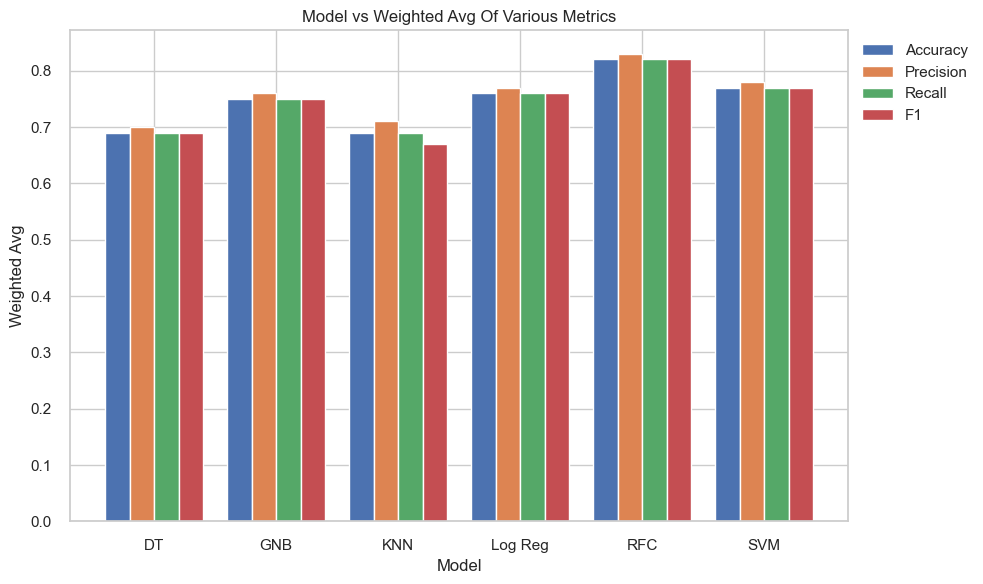

In [29]:
# Models
X = ['DT', 'GNB', 'KNN', 'Log Reg', 'RFC', 'SVM']

# Collect this information from the classification reports and store them in lists
accuracy = [0.69, 0.75, 0.69, 0.76, 0.82, 0.77]
precision = [0.70, 0.76, 0.71, 0.77, 0.83, 0.78]
recall = [0.69, 0.75, 0.69, 0.76, 0.82, 0.77]
f1 = [0.69, 0.75, 0.67, 0.76, 0.82, 0.77]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Plotting the bars for each metric using the left positions and respective data
ax.bar(left_positions, accuracy, bar_width, label='Accuracy')
ax.bar(left_positions + bar_width, precision, bar_width, label='Precision')
ax.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
ax.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
ax.set_xticks(X_axis)
ax.set_xticklabels(X)
ax.set_xlabel("Model")
ax.set_ylabel("Weighted Avg")
ax.set_title("Model vs Weighted Avg Of Various Metrics")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legend on the right

plt.tight_layout()  # Ensures labels and titles are properly displayed
plt.show()

<div style="background-color: lightblue; padding: 10px; font-weight: bold; font-size: 20px">
EXTRACTING PICKLES
</div>

Extracting pickels for the **Random Rorest** classifier (Best Performer) and for the scaler.

In [30]:
# Save the trained model and the scaler to files
with open('p2_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)
with open('p2_image_scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

<div style="background-color: lightblue; padding: 10px; font-weight: bold; font-size: 20px">
MODEL DEPLOYMENT
</div>

# https://asciorilli.pythonanywhere.com/skin_tumor_image_classifier